# Defining and Training Neural Networks

What we will learn:
- How to initialize a NN
- Forward pass
- Backward pass
- Optimization of the network parameters

## Pytorch: <code>nn</code>

The <code>nn</code> package defines a set of Modules (i.e. neural networks layers).

Each module receive an input and produces an output.

The <code>nn</code> package also defines losses. 

In [ ]:
# Import libs
import torch
import torch.nn as nn

import math
from IPython import display

### Objective
Create a model that approximate the $sin(x)$ function.

In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000) #tensor from -pi to +pi with 2000 elements equispaced
y = torch.sin(x)

In [ ]:
# For this example, the network will learn the Sin function using a Polynomial Approximation.
# The output y is a function of (x, x^2, x^3), so
# we can consider it as an output of a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
print(xx.size())

In [ ]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

In [ ]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
# Construct the Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters
# which are members of the model.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### MSE Loss
$$\mathcal{L}_{MSE} = \frac{1}{n}\sum^n_{i=n}(y - \hat{y})^2$$

In [ ]:
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y) # (y_pred - y).pow(2).mean()
    
    # Print loss every 200 epochs
    if t % 200 == 199:
        print(t, loss.item())
    
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()
    
    # Alternative: zero the gradients of the model
    # model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward() 

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    # Alternative: Update the weights using gradient descent MANUALLY. Each parameter is a Tensor, so
    # we can access its gradients.
    """
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    """

In [ ]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

In [ ]:
# The network has effectively learned something?
idx = 1000
print(xx[idx]) # x[500] = -pi/2
print("%.6f %.6f" % (model(xx)[idx].item(), torch.sin(x)[idx]))

In [ ]:
# plot results
import matplotlib.pyplot as plt
from res.plot_lib import plot_data, plot_data_np, plot_model, set_default
set_default()

yy = model(xx)
plt.plot(x,y, label='Sin(x)')
plt.plot(x,yy.detach().numpy(), label='model(x)')
plt.legend()
plt.show()

## Custom models

In [ ]:
class SinModel(nn.Module):
    def __init__(self, in_dim = 3, out_dim = 1):
        """
        In the constructor we instantiate all the layer of the NN
        """
        super().__init__()
        # self.model = nn.Sequential(
        #     nn.Linear(in_dim, out_dim),
        #     nn.Flatten(0, 1)
        # )
        """
        In alternative we could also define each layer individually
        """
        self.l1 = nn.Linear(3, 1)
        self.flt = nn.Flatten(0, 1)
        
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        #return self.model(x)
        x = self.l1(x)
        # do stuff
        return self.flt(x)

In [ ]:
# Construct our model by instantiating the class defined above
model = SinModel()

print(model)

In [ ]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(xx)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 200 == 199:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# The network has effectively learned something?
idx = 500
print(xx[idx]) # x[500] = -pi/2
print("%.6f %.6f" % (model(xx)[idx].item(), torch.sin(x)[idx]))

In [ ]:
yy = model(xx)

plt.plot(x,y, label='Sin(x)')
plt.plot(x,yy.detach().numpy(), label='model(x)')
plt.legend()
plt.show()

In [ ]:
# Ex1: write a model (using custom modules) where the output y is a function of (x, x^2)
# and it approximates the cosine function

In [ ]:
# Import libs
import torch
import torch.nn as nn

import math
from IPython import display

In [ ]:
x1 = torch.linspace(-math.pi, math.pi, 2000)
y1 = torch.cos(x1)

p1 = torch.tensor([1, 2])
xx1 = x1.unsqueeze(-1).pow(p1)
print(xx1.size())

In [ ]:
class CosModel(nn.Module):
    def __init__(self, in_dim = 2, out_dim = 1):
        """
        In the constructor we instantiate all the layer of the NN
        """
        super().__init__()
        # self.model = nn.Sequential(
        #     nn.Linear(in_dim, out_dim),
        #     nn.Flatten(0, 1)
        # )
        """
        In alternative we could also define each layer individually
        """
        self.l1 = nn.Linear(2, 1)
        self.flt = nn.Flatten(0, 1)
        
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        #return self.model(x)
        x = self.l1(x)
        # do stuff
        return self.flt(x)

In [ ]:
# Construct our model by instantiating the class defined above
model = CosModel()

print(model)

In [ ]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(xx1)

    # Compute and print loss
    loss = criterion(y_pred, y1)
    if t % 200 == 199:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# The network has effectively learned something?
idx = 500
print(xx1[idx]) # x[500] = -pi/2
print("%.6f %.6f" % (model(xx1)[idx].item(), torch.cos(x1)[idx]))

In [ ]:
import matplotlib.pyplot as plt
from res.plot_lib import plot_data, plot_data_np, plot_model, set_default
set_default()

yy1 = model(xx1)
plt.plot(x1,y1, label='Cos(x)')
plt.plot(x1,yy1.detach().numpy(), label='model(x)')
plt.legend()
plt.show()

In [ ]:
# Ex2: write a model (using custom modules) where the output y is a function of (x, x^2, x^3)
# and it approximates the function -5 + 2*x + 3/4x^2 + 7*x^3
# which values do you expect bias and weights should have after training?

In [2]:
# Import libs
import torch
import torch.nn as nn

import math
from IPython import display

In [3]:
x2 = torch.linspace(-math.pi, math.pi, 2000)
f = lambda x: -5 + 2*x + 3/4*x**2 + 7*x**3

p2 = torch.tensor([1, 2, 3])
xx2 = x2.unsqueeze(-1).pow(p2)
print(xx2.size())


torch.Size([2000, 3])


In [4]:
class FuncModel(nn.Module):
    def __init__(self, in_dim = 3, out_dim = 1):
        """
        In the constructor we instantiate all the layer of the NN
        """
        super().__init__()
        # self.model = nn.Sequential(
        #     nn.Linear(in_dim, out_dim),
        #     nn.Flatten(0, 1)
        # )
        """
        In alternative we could also define each layer individually
        """
        self.l1 = nn.Linear(3, 1)
        self.flt = nn.Flatten(0, 1)
        
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        #return self.model(x)
        x = self.l1(x)
        # do stuff
        return self.flt(x)

In [5]:
model = FuncModel()

print(model)

FuncModel(
  (l1): Linear(in_features=3, out_features=1, bias=True)
  (flt): Flatten(start_dim=0, end_dim=1)
)


In [9]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred2 = model(xx2)

    # Compute and print loss
    loss2 = criterion(y_pred2, f(x2))
    if t % 200 == 199:
        print(t, loss2.item())
        print("Weights:", model.l1.weight.data)
        print("Bias:", model.l1.bias.data)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss2.backward()
    optimizer.step()

199 5.536426544189453
Weights: tensor([[0.9641, 0.1732, 7.1473]])
Bias: tensor([-1.6567])
399 3.8922433853149414
Weights: tensor([[1.1576, 0.2648, 7.1198]])
Bias: tensor([-2.1873])
599 2.7374351024627686
Weights: tensor([[1.3149, 0.3418, 7.0975]])
Bias: tensor([-2.6337])
799 1.9259848594665527
Weights: tensor([[1.4428, 0.4066, 7.0793]])
Bias: tensor([-3.0093])
999 1.3555498123168945
Weights: tensor([[1.5469, 0.4611, 7.0645]])
Bias: tensor([-3.3253])
1199 0.9543877840042114
Weights: tensor([[1.6315, 0.5069, 7.0524]])
Bias: tensor([-3.5911])
1399 0.6721584796905518
Weights: tensor([[1.7003, 0.5455, 7.0426]])
Bias: tensor([-3.8147])
1599 0.47353261709213257
Weights: tensor([[1.7563, 0.5780, 7.0347]])
Bias: tensor([-4.0028])
1799 0.3336988091468811
Weights: tensor([[1.8018, 0.6053, 7.0282]])
Bias: tensor([-4.1611])
1999 0.2352190762758255
Weights: tensor([[1.8388, 0.6282, 7.0229]])
Bias: tensor([-4.2942])


In [10]:
# The network has effectively learned something?
idx2 = 500
print(xx2[idx2])
print("%.6f %.6f" % (model(xx2)[idx2].item(), f(x2)[idx2]))

tensor([-1.5700,  2.4649, -3.8700])
-32.811638 -33.381119


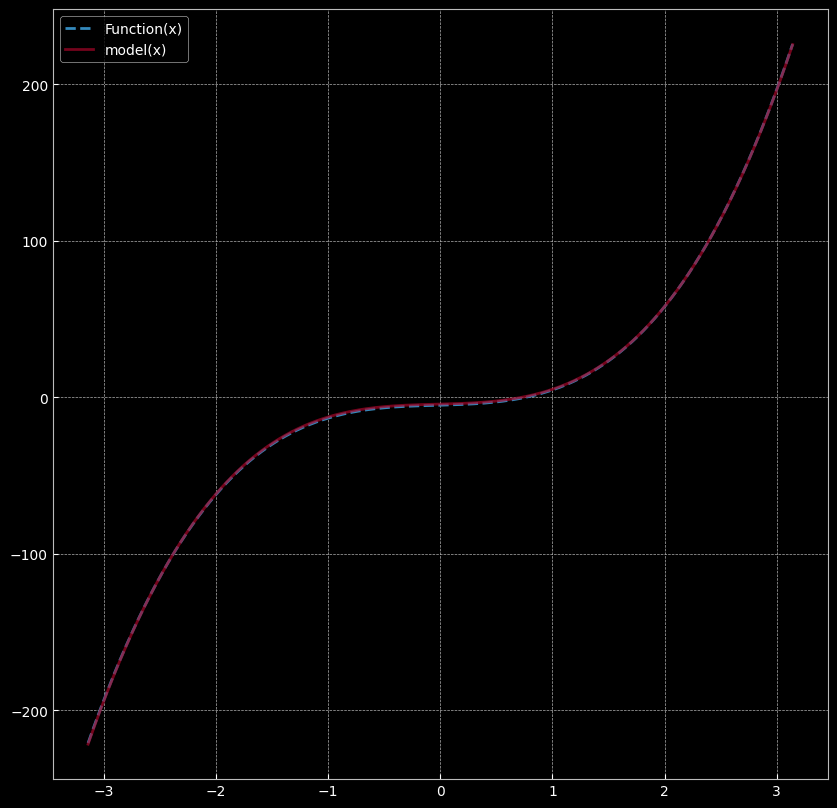

In [11]:
import matplotlib.pyplot as plt
from res.plot_lib import plot_data, plot_data_np, plot_model, set_default
set_default()

yy2 = model(xx2)
plt.plot(x2,f(x2), label='Function(x)', linestyle="dashed")
plt.plot(x2,yy2.detach().numpy(), label='model(x)', alpha=0.7)
plt.legend()
plt.show()